<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/graphes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comme le présente Claude Berge 1, un graphe est un ensemble de points et un ensemble de flèches dont chacune relie deux points.

Mathématiquement, un graphe2  G  est donc un couple  (V,E) où :

* V : est un ensemble (des sommets du graphes)
* E : est un ensemble de couples de  V (les arcs du graphes)

D’un point de vue informatique on dispose de plusieurs représentations des graphes3 parmi lesquelles :

* la matrice d’ajacence,
* les listes d’arcs,
* les listes de successeurs.


## Il y a au moins quatre domaines principaux où les graphes fournissent du contexte à l'IA :

* Tout d'abord les graphes de connaissances, qui fournissent un contexte pour l'aide à la décision et aident à s'assurer que les réponses sont appropriées à la situation.
* Ensuite, les graphes offrent une plus grande efficacité de traitement et, par conséquent, l'apprentissage automatique s’en trouve accéléré dans la mesure où les graphes optimisent les modèles et accélèrent ainsi les processus.
* Troisièmement, l'extraction d'entités connectées analyse les données pour identifier les éléments les plus prédictifs des données. Baser un modèle prédictif sur des caractéristiques fortes trouvées dans les données améliore la précision.
* Enfin, les graphes offrent un moyen d'assurer la transparence dans la façon dont l'IA prend ses décisions. C'est ce qu'on appelle l'explicabilité de l'intelligence artificielle.

## Apprentissage non supervisé (aplications)

Elle permet l'usage de catégories entières d’algorithmes de graphes pour l’extraction d’informations métiers exploitables :
*  Détection de communautés
* PageRank
* Propagation de labels
* Centralité d’intermédiarité (betweenness)
* Centralité de proximité (closeness)
* Voisinages similaires

## Des réseaux de neurones adaptés aux graphes

Xavier Bresson est aujourd’hui professeur associé à la School of Computing de la National University of Singapore. Alors qu’il était chercheur à l’EPFL, il a cosigné cette publication² de 2016 qui a réussi à utiliser des CNN sur des graphes. « Les premières tentatives pour travailler sur des graphes faisaient appel à des types de réseaux de neurones bien connus, se souvient le chercheur. Comme les perceptrons multicouches, où chaque neurone est connecté à tous les neurones de la couche précédente. En gros, cela ne marchait pas. Les premiers résultats intéressants ont donc été obtenus avec les réseaux de neurones convolutifs (CNN), mais aussi les réseaux de neurones récurrents (RNN), notamment les LSTM (Long Short-Term Memory). »

On distingue, aujourd’hui, divers types de Graph Neural Networks (GNNs). Après le Graph Convolutional Network (GCN) est apparu le Graph Attention Network (GAT), inspiré du transformer et du mécanisme d’attention⁴. La liste ne cesse de s’allonger. Xavier Bresson a, par exemple, cosigné tout récemment une publication⁵ proposant un nouveau type de GNN, le Multigraph Transformer (MGT), adapté en particulier à l’apprentissage de représentations de croquis (« free-hand sketch »). On peut supposer que le darwinisme éclaircira cette abondante floraison. « Nous avons un papier⁶ accepté à ICLR 2021 [International Conference on Learning Representations, NDLR] qui propose un cadre théorique permettant de comparer le pouvoir d’expression de ces diverses architectures de GNN », signale Marc Lelarge.

## Articles :

Peng Xu, Chaitanya Joshi, Xavier Bresson, “Multigraph transformer for free-hand sketch recognition”, IEEE Transactions on Neural Networks and Learning Systems, 2021. 

Waiss Azizian, Marc Lelarge, “Expressive Power of Invariant and Equivariant Graph Neural Networks”, ICLR 2021. arXiv

Shantanu Thakoor et al., “Bootstrapped Representation Learning on Graphs”, GTRL Workshop, ICLR 2021 arXiv

Problème classique : https://fr.wikipedia.org/wiki/Probl%C3%A8me_du_voyageur_de_commerce 

https://fr.wikipedia.org/wiki/Algorithme_de_Dijkstra


Il existe deux grandes bibliothèques en python pour la gestion des graphes :

* networkx
* igraph
La nouvelle version (2.2) de networkx couvre largement ce dont on a besoin pour créer, manipuler et analyser les réseaux.

documentation : https://networkx.org/documentation/stable/tutorial.html
https://networkx.github.io/documentation/stable/index.html


In [2]:
!pip install networkx

##  Introduction à networkx

In [3]:
# Import de la bibliothèque
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [4]:
g = nx.Graph() # DiGraph() pour un graphe orienté
g.add_nodes_from(range(5))
g.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2)])

Les méthodes suivantes permettent d’accéder aux attributs du graphe et fournissent les primitives essentielles :

* g.degree() : degrés des sommets du graphe g
* g.number_of_nodes() : nombre de sommets du graphe g
* g.number_of_edges() : nombre d’arcs du graphe g
* g.predecessors(i) : liste des prédecesseurs du sommet i
* g.successors(i) : liste des successeurs du sommet i
* g.neighbors(i) : liste des voisins du sommet i

On dispose aussi des indicateurs et outils suivants (liste non exhaustive) :

* density(g) : densité du graphe g
* diameter(g) : diamètre du graphe g
* shortest_path(g) : plus courts chemins entre tous les couples de sommets de g
* pagerank(g) : calcul du pagerank

-------------------------------------------------------------------------

# Préliminaires
## Graphes orientés en NetworkX

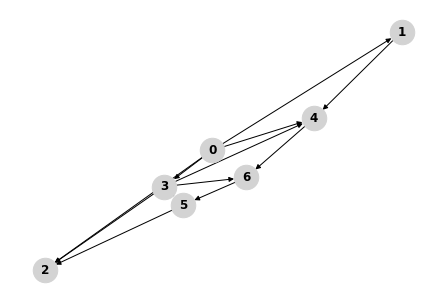

In [34]:
g = nx.DiGraph()
l = [(0,1,5),(0,2,7),(0,3,4),(0,4,2),(1,4,2),(3,4,3),(3,6,4),(3,5,7),(3,2,9),(4,6,7),(6,5,12),(5,2,5)]
for a,b,w in l:
    g.add_edge(a,b,weight=w)
nx.draw(g,with_labels=True,node_color='lightgrey',node_size=600,font_weight='bold')

## Rappel de l'algorithme
Pour rappel, l'algorithme de Dijkstra peut s'implémenter avec une structure de données disposant de 3 opérations :

insérer un élément
extraire l'élément minimum
diminuer un élément
Un élément doit ici être entendu comme un couple constitué d'un sommet d'un graphe et de la distance associée (par rapport à un sommet de départ).

On peut alors avoir une expression de l'algorithme qui est :

Entrée : un graphe G, un sommet de départ
Sortie : les distances les plus courtes entre le sommet de départ et chacun des sommets de G

    initialiser la structure de données SD
    créer un tableau T qui conservera les distances
    tant qu'il reste des sommets à traiter dans SD faire
        nmin, dmin = extraire l'élément minimum de SD
        enregistrer dans T la distance dmin pour le sommet nmin       
        pour chaque voisin du sommet nmin faire
            mettre à jour si besoin la distance associée au voisin dans la SD           
    renvoyer T

## La structure de données pour implanter l'algorithme
On propose ci-dessous la définition d'une interface pour implanter la structure de données permettant de mettre en œuvre l'algorithme de Dijkstra tel que décrit ci-dessus.

In [35]:
class DSD (object):
    """
    DSD = Data Structure for Dijkstra algorithm
    
    Cette structure de données implémente les trois opérations nécessaires à la mise en
    œuvre de l'algorithme de Dijkstra.
    
    
    """
    
    def __init__ (self, graph, start):
        """
        Initialise la structure de données avec une distance de 0 associée au sommet 
        `start` du `graph` et l'infini pour les autres.
        """
        assert(start in graph.nodes())
        self.__graph = graph
        self.__start = start
        pass
        
    def insert (self, node, distance):
        """
        Ajoute le sommet `node` à la strucuture de données en y associant la distance
        `distance`.
        """
        pass
        
    def extract_min (self):
        """
        Retourne un couple (sommet,distance) correspondant à la distance minimale stockée
        dans la structure de données. Par effet de bord, cet élément est retiré de la 
        structure de données.
        
        Si la structure de données est vide produit une erreur.
        """
        pass
        
    def decrease (self, node, distance):
        """
        Met à jour la distance associée au sommet `node`.
        Cette mise à jour n'est réalisée que si `distance`est inférieure à la valeur 
        associée à `node`dans la structure de donnée.
        Sinon ne fait rien.
        """
        pass
    

    def is_empty (self):
        pass

## Implémentation de l'algorithme
Proposer une implantation en Python de l'algorithme de Dijkstra utilisant cette interface (bien sûr, il ne sera pas possible de tester tant qu'on n'a pas au moins une réalisation de cette interface).



In [36]:
def plus_court_chemin (graph, start, dsdo):
    """
    Calcule le plus court chemin dans `graph` entre le sommet de départ `start` et 
    tous les autres sommets accessibles.
    
    Parametres
    ----------
    graph: networkX.DiGraph ou networkx.Graph
        le graphe
    start: int
        le sommet de départ
    dsdo: Class
        le nom d'une classe qui hérite de DSD
        
    Retourne
    --------
    dict
        un dictionnaire des distances entre `start` et les autres sommets
    """
    pass

## Implémentation avec un tableau
On propose de débuter par une implémentation de la structure de données qui utilise un tableau (ou une liste en Python), comme décrit dans le polycopié.

Implanter une classe DSDArray.

In [37]:
import math

class DSDArray (DSD):
    
    def __init__(self,graph,start):
        super().__init__(graph,start) 
        
        
    def insert(self, node, distance):
        pass
        
    def extract_min(self):
        pass
        
    def decrease(self, node, distance):
        pass
            
    def is_empty(self):
        return True
    
    def __str__(self):
        return ""

In [38]:
plus_court_chemin (g, 0, DSDArray)

## Observation du temps de calcul
Génération de graphes connexes aléatoires
La génération de graphes orientés aléatoires fortement connexes (pour s'assurer qu'on trouvrea un chemin entre tout paire de sommets) n'est pas très facile. On propose donc ici de revnir à des graphes non orientés et de s'appuyer sur la proposition ci-dessous pour avoir un générateur de graphes aléatoires dont la densité en nombre d'arêtes peut être ajustée.

https://stackoverflow.com/questions/61958360/how-to-create-random-graph-where-each-node-has-at-least-1-edge-using-networkx

In [39]:
from itertools import combinations, groupby
import networkx as nx
import random

def gnp_random_connected_graph(n, p):
    """
    Generates a random undirected graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is connected
    """
    assert p > 0 and p <= 1
    edges = combinations(range(n), 2)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    if p >= 1:
        return nx.complete_graph(n, create_using=G)
    for _, node_edges in groupby(edges, key=lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < p:
                G.add_edge(*e)
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(1,100)
    return G

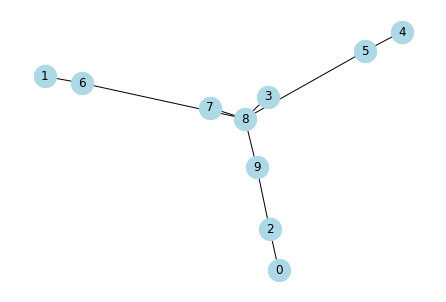

In [40]:
G = gnp_random_connected_graph(10,0.01)
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

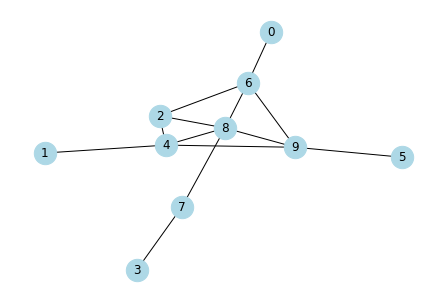

In [41]:
G = gnp_random_connected_graph(10,0.1)
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

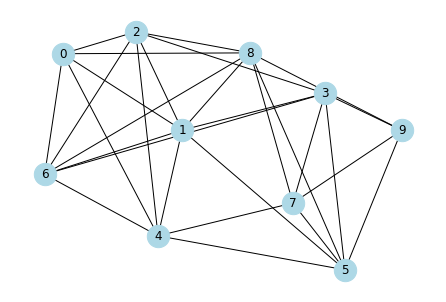

In [42]:
G = gnp_random_connected_graph(10,0.5)
nx.draw(G, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

## Mesure du temps de calcul
On propose d'utiliser timeit pour mesurer le temps d'exécution. Cela peut-être réalisé dans le Notebook comme montré en exemple ci-dessous mais aussi via la ligne de commande.

In [43]:
import timeit

In [44]:
def test_Dijkstra_networkX(order):
    G = gnp_random_connected_graph(order,0.005) 
    nx.shortest_path_length(G, source=0, target=G.order()-1,weight='weight')

In [45]:
%timeit -n 10 test_Dijkstra_networkX(200)

10 loops, best of 5: 7.39 ms per loop


Créer une fonction test similaire à celle ci-dessus pour votre implémentation basée sur la structure de données avec tableaux.

In [46]:
def test(order): 
    pass

In [47]:

def test(order): 
    pass
%timeit -n 10 test(200)

10 loops, best of 5: 137 ns per loop


--------------------------------------------------------------------------

# Analyse d’un réseau social d’Orques
## Construction du réseau

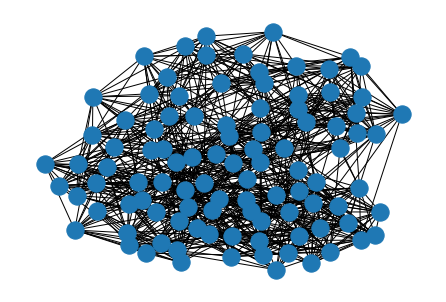

In [5]:
g = nx.newman_watts_strogatz_graph(100, 15, 0.35, seed = 12345 )
plt.figure()
nx.draw(g)
plt.show()

In [6]:
# Noms des sommets (les membres de nos réseau social) 
names = [ "Geygrat",    "Dalba",      "Orcgro",   "Brukzhul", "Rumsnarl",
          "Ub",         "Buckner",    "Nershnag", "Murbaag",  "Bagthrum",
          "Irok",       "Gratdu",     "Skumzu",   "Zugzu",    "Shnagta",
          "Gruntlúrtz", "Nackgim",    "Rendah",   "Zogdahk",  "Grim",
          "Kashgash",   "Murzgor",    "Tanazg",   "Zugsnarl", "Nackdah",
          "Dorg",       "Bruksel",    "Rokgar",   "Gauz",     "Triggba",
          "Zogug",      "Kilrogg",    "Kilmuz",   "Gimb",     "Kaglug",
          "Ronggimb",   "Ubgor",      "Rongzoc",  "Tulrok",   "Shagaluk",
          "Jubag",      "Gromgar",    "Dushner",  "Shaggarm", "Rokarg",
          "Lurtzka",    "Golgimgash", "Baagkil",  "Shurub",   "Bagro",
          "Nákhdahk",   "Rokgor",     "Telúrtz",  "Danmeg",   "Shagte",
          "Duzgor",     "Dablorg",    "Gorhúr",   "Badork",   "Lagong",
          "Thokner",    "Luknerzock", "Megcro",   "Geyta",    "Zockmog",
          "Tugri",      "Dogbal",     "Lugu",     "Gimgrom",  "Buzbol",
          "Usnarlburz", "Doggrat",    "Guli",     "Orca",     "Baggar",
          "Bolckor",    "Gratco",     "Thakglúk", "Zuga",     "Zuor",
          "Jugor",      "Balga",      "Orcrad",   "Skabnaz",  "Glukhurtz",
          "Orprukharg", "Grunthar",   "Tanmeggu", "Durmurz",  "Zu-gul",
          "Grarend",    "Ugim",       "Húrthrum", "Drog",     "Likrok",
          "Kargcrou",   "Ronurk",     "Kargu",    "Garmburz", "Tinourk"]
for n in g.nodes:
  g.nodes[n]["name"]=names[n]

## Affichage (pour illustrer les paramètres graphiques)

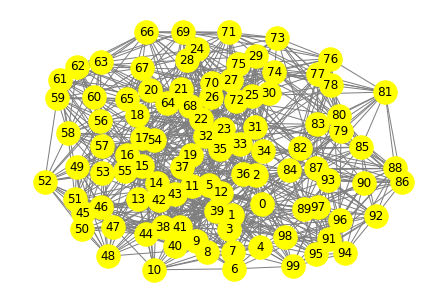

In [7]:
options = {
      'node_color' : 'yellow',
      'node_size'  : 550,
      'edge_color' : 'tab:grey',
      'with_labels': True
    }
plt.figure()
nx.draw(g,**options)
plt.show()

## Analyse
Nous allons maintenant nous intéresser aux questions vraiment importantes…

* Quels sont les Orques les plus importants/centraux ?
* Quels sont les Orques les plus critiques pour la cohésion du réseau ?
* Quelles suggestions d’amis faut-il faire pour « consolider » le réseau ?
* Y a-t-il des communautés qui se sont formées ?
* Comment l’information va-t-elle se propager dans mon réseau ?

Nous allons déjà déterminer les Orques qui occupent des positions importantes dans ce réseaux en identifiant les leaders. Commençons par utiliser l’information de degré :

In [8]:
print(g.degree())

[(0, 25), (1, 25), (2, 23), (3, 22), (4, 18), (5, 24), (6, 18), (7, 18), (8, 18), (9, 18), (10, 15), (11, 22), (12, 25), (13, 20), (14, 19), (15, 22), (16, 21), (17, 18), (18, 19), (19, 23), (20, 16), (21, 18), (22, 19), (23, 19), (24, 17), (25, 22), (26, 22), (27, 20), (28, 17), (29, 16), (30, 17), (31, 17), (32, 20), (33, 18), (34, 18), (35, 19), (36, 21), (37, 20), (38, 18), (39, 23), (40, 18), (41, 21), (42, 21), (43, 25), (44, 20), (45, 18), (46, 17), (47, 20), (48, 16), (49, 19), (50, 19), (51, 17), (52, 17), (53, 20), (54, 23), (55, 22), (56, 19), (57, 19), (58, 18), (59, 16), (60, 18), (61, 16), (62, 17), (63, 17), (64, 20), (65, 20), (66, 18), (67, 19), (68, 23), (69, 16), (70, 21), (71, 18), (72, 21), (73, 16), (74, 19), (75, 19), (76, 16), (77, 16), (78, 16), (79, 19), (80, 19), (81, 15), (82, 19), (83, 18), (84, 23), (85, 18), (86, 15), (87, 21), (88, 16), (89, 21), (90, 17), (91, 18), (92, 17), (93, 20), (94, 16), (95, 17), (96, 18), (97, 17), (98, 17), (99, 16)]


In [9]:
# Cherchons le degré le plus élevé
degre_max = max(np.array(g.degree())[:,1])
print(degre_max)

25


In [10]:
# Puis les positions des Orques ayant ce degré 
index_max = [i for i,j in g.degree() if j == degre_max]
print(index_max)

[0, 1, 12, 43]


In [11]:
# On obtient alors la liste des Orques les plus centraux d’après le degré :
orques_deg_max = [ g.nodes[i]["name"] for i in index_max ]
print(orques_deg_max)

['Geygrat', 'Dalba', 'Skumzu', 'Shaggarm']


In [12]:
# centralité de degré

centralite = nx.degree_centrality(g)
centralite_ind = list(centralite.keys())
centralite_val = list(centralite.values())
maximum = max(centralite_val)
sommets_centralite_max = [centralite_ind[i] for i in g.nodes if centralite_val[i] == maximum]
print(sommets_centralite_max)

[0, 1, 12, 43]


In [13]:
orques_centraux = [ g.nodes[i]["name"] for i in sommets_centralite_max ]
print(orques_centraux)

['Geygrat', 'Dalba', 'Skumzu', 'Shaggarm']


In [14]:
# centralité de proximité

centralite = nx.closeness_centrality(g)
centralite_ind = list(centralite.keys())
centralite_val = list(centralite.values())
maximum = max(centralite_val)
sommets_centralite_max = [centralite_ind[i] for i in g.nodes if centralite_val[i] == maximum]
print(sommets_centralite_max)

[0, 1]


In [15]:
orques_centraux = [ g.nodes[i]["name"] for i in sommets_centralite_max ]
print(orques_centraux)

['Geygrat', 'Dalba']


In [16]:
# centralité d’intermédiarité


centralite = nx.betweenness_centrality(g)
centralite_ind = list(centralite.keys())
centralite_val = list(centralite.values())
maximum = max(centralite_val)
sommets_centralite_max = [centralite_ind[i] for i in g.nodes if centralite_val[i] == maximum]
print(sommets_centralite_max)

[54]


In [17]:
orques_centraux = [ g.nodes[i]["name"] for i in sommets_centralite_max ]
print(orques_centraux)

['Shagte']


On peut visualiser ces sommets en utilisant d’autres couleurs :

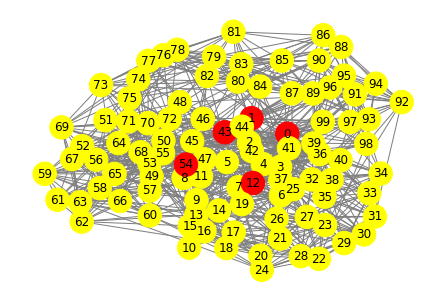

In [18]:
# Initialisation
couleurs_sommets = ["yellow"] * g.number_of_nodes() 
# Coloration des somemts d'intérêt
sommets_a_voir = [0, 1, 12, 43, 54]
for i in sommets_a_voir:
  couleurs_sommets[i] = "red"
# Visualisation
options = {
      'node_color' : couleurs_sommets,
      'node_size'  : 550,
      'edge_color' : 'tab:grey',
      'with_labels': True
    }
plt.figure()
nx.draw(g,**options)
plt.show()

## Détection de communautés

La fonction greedy_modularity_communities() de networkx permet d’extraire des communautés par maximisation de la modularité :

In [19]:
from networkx.algorithms import community
partition = community.greedy_modularity_communities(g)

Nombre de partitions trouvées :

In [20]:
print(len(partition))

3


In [21]:
# Affichage de la composition des communautés :
for i in range(len(partition)):
  community = list(partition[i])
  print("Communauté ",str(i+1))
  print([ g.nodes[i]["name"] for i in community ])

Communauté  1
['Geygrat', 'Dalba', 'Orcgro', 'Brukzhul', 'Rumsnarl', 'Ub', 'Geyta', 'Zockmog', 'Tugri', 'Dogbal', 'Lugu', 'Gimgrom', 'Buzbol', 'Usnarlburz', 'Doggrat', 'Guli', 'Orca', 'Baggar', 'Bolckor', 'Gratco', 'Thakglúk', 'Zuga', 'Zuor', 'Jugor', 'Balga', 'Orcrad', 'Skabnaz', 'Glukhurtz', 'Orprukharg', 'Grunthar', 'Tanmeggu', 'Durmurz', 'Zu-gul', 'Grarend', 'Ugim', 'Húrthrum', 'Drog', 'Likrok', 'Kargcrou', 'Ronurk', 'Kargu', 'Garmburz', 'Tinourk']
Communauté  2
['Dorg', 'Bruksel', 'Rokgar', 'Gauz', 'Triggba', 'Zogug', 'Kilrogg', 'Kilmuz', 'Gimb', 'Kaglug', 'Ronggimb', 'Ubgor', 'Rongzoc', 'Tulrok', 'Shagaluk', 'Jubag', 'Gromgar', 'Dushner', 'Shaggarm', 'Rokarg', 'Lurtzka', 'Golgimgash', 'Baagkil', 'Shurub', 'Bagro', 'Nákhdahk', 'Rokgor', 'Telúrtz', 'Danmeg', 'Shagte', 'Duzgor', 'Dablorg', 'Gorhúr', 'Badork', 'Lagong', 'Thokner', 'Luknerzock', 'Megcro']
Communauté  3
['Buckner', 'Nershnag', 'Murbaag', 'Bagthrum', 'Irok', 'Gratdu', 'Skumzu', 'Zugzu', 'Shnagta', 'Gruntlúrtz', 'Nackgim

Visualisation par contruction d’un vecteur de couleurs :

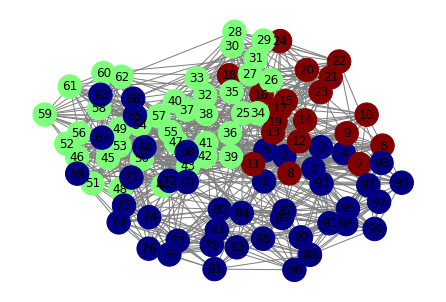

In [22]:
couleurs_num = [0] * g.number_of_nodes()
for i in range(len(partition)):
  for j in partition[i]:
    couleurs_num[j] = i

options = {
      'cmap'       : plt.get_cmap('jet'), 
      'node_color' : couleurs_num,
      'node_size'  : 550,
      'edge_color' : 'tab:grey',
      'with_labels': True
    }
plt.figure()
nx.draw(g,**options)
plt.show()

## Détection des Orques critiques

Essayons de détecter les points d’articulation de ce graphe :

In [23]:
pt = nx.articulation_points(g)
print([i for i in pt])

[]


Il n’y en a pas ! Ce qui n’est pas surpenant compte tenu de la structure et de la densité du graphe. On peut générer un graphe moins dense afin de tester cette fonction :

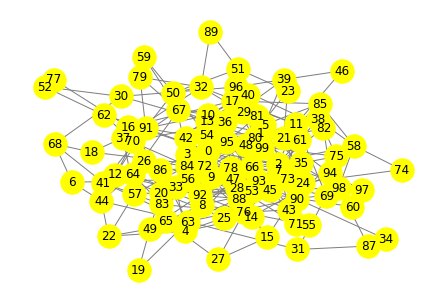

In [24]:
g = nx.erdos_renyi_graph(100, 0.05, seed=12345, directed=False)
options = {
      'node_color' : 'yellow',
      'node_size'  : 550,
      'edge_color' : 'tab:grey',
      'with_labels': True
    }
plt.figure()
nx.draw(g,**options)
plt.show()

In [25]:
pt = nx.articulation_points(g)
print([i for i in pt])

[16]


## Effet « petit monde »
Même ce graphe a été généré à l’aide de paramètres contrôlés et non représentatifs des réseaux sociaux existants, on peut se demander si « l’effet petit monde » est vérifié ici, en calculant la distance géodésique moyenne entre les couples de points :

In [26]:
p = nx.shortest_path(g) 
n = g.number_of_nodes()
nb_inter = []
for i in range(n):
  for j in range(i+1,n):
    nb_inter.append(len(p[i][j])-2)
# On aurait pu éviter la double boucle
# nb_inter2 = [len(p[i][j]) for i in range(n) for j in range(i+1,n)]
print("Nombre d'intermédiaires entre les individus du réseau")

Nombre d'intermédiaires entre les individus du réseau


In [27]:
print("- Minimum   : ", str(np.min(nb_inter)))

- Minimum   :  0


In [28]:
print("- Maximum   : ", str(np.max(nb_inter)))

- Maximum   :  5


In [29]:
print("- Moyenne   : ", str(np.mean(nb_inter)))

- Moyenne   :  1.9355555555555555


In [30]:
print("- Médiane   : ", str(np.median(nb_inter)))

- Médiane   :  2.0


## Pagerank des utilisateurs

In [31]:
pg = nx.pagerank(g)
print(pg.values())

dict_values([0.012410658206759137, 0.01212305075164018, 0.01537636865860715, 0.012238493246695946, 0.009721810052160851, 0.015498914820198498, 0.006567865582034465, 0.010833424081096122, 0.010690183187240439, 0.009140179111882423, 0.010967267967390648, 0.013226707534845934, 0.006062732559290098, 0.00965380071554754, 0.010796055598715907, 0.007833784114816035, 0.01385174740291166, 0.00943989834327927, 0.00662597473590978, 0.004710706635652237, 0.012803212585088132, 0.013753561040271228, 0.008128145806201165, 0.007821904618872883, 0.012753871062076308, 0.007804553784104954, 0.0061261027031973385, 0.006312725254592929, 0.015537004572169362, 0.007801929078782581, 0.008955166684363249, 0.007074976899034182, 0.011705091697721996, 0.007798715930785881, 0.005124537919614415, 0.009292356672953611, 0.01114165393519032, 0.008193535822184517, 0.009248974166006216, 0.009975906738189936, 0.007751652848825906, 0.008230944875608265, 0.010813436634180827, 0.010501544558833816, 0.010010429574113465, 0.0

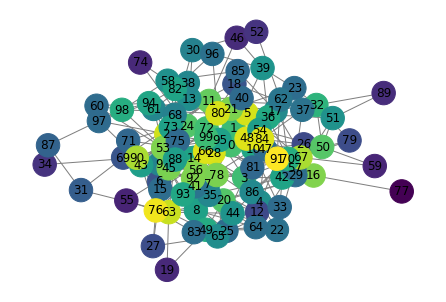

In [32]:
options = {
      'cmap'       : plt.get_cmap('viridis'), 
      'node_color' : list(pg.values()),
      'node_size'  : 550,
      'edge_color' : 'tab:grey',
      'with_labels': True
    }
plt.figure()
nx.draw(g,**options)
plt.show()

In [33]:
# Et notre vainqueur est :

pg_val = list(pg.values())
pg_key = list(pg.keys())
id_pg_max = [i for i in pg_key if pg[i] == max(pg_val)]
print(id_pg_max[0])

91
